In [ ]:
# SDA_HW5_60231172_김예랑

In [ ]:
# 직업군과 직업군을 결정할 수 있는 기타 요소(교육 수준, 연령, 인종) 살펴본 다음 직업군을 중심으로 한 변수들이 수입 수준에 얼마나 영향을 미치는지

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv('adult.csv')
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
data['income'] = data['income'].map({"<=50K": 0, ">50K": 1})
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


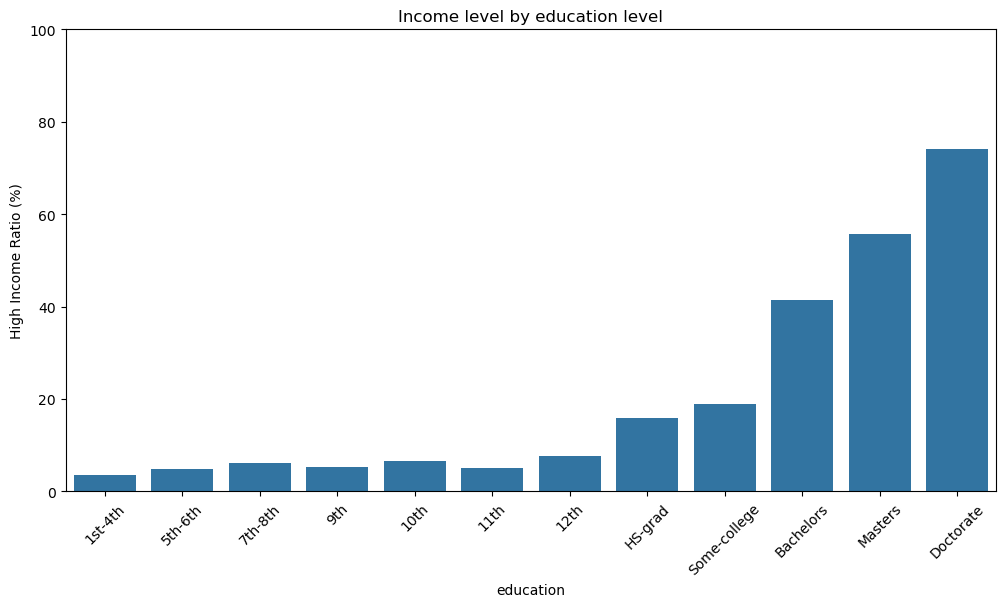

In [16]:
# 1. 교육 수준에 따른 직업군이 수입 수준에 미치는 영향 분석

education_order = [
    '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'
]

# 각 교육 수준별 고소득 비율 계산
education_income_ratio = data.groupby('education')['income'].mean().reset_index()
education_income_ratio['income'] = education_income_ratio['income'] * 100  # 비율로 변환

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='income', data=education_income_ratio, order=education_order)
plt.title('Income level by education level')
plt.ylabel('High Income Ratio (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # 비율이므로 0%에서 100%로 설정
plt.show()

In [14]:
# 로지스틱 회귀 분석
edu_income_model = smf.logit('income ~ education', data=data).fit()
print(edu_income_model.summary())

# p-값: 대부분의 교육 수준이 p<0.05로 유의미하며, 해당 변수들이 소득에 미치는 영향을 무시할 수 없다.
# 단, Preschool, 1st-4th, 5th-6th 등은 p > 0.05로 유의미하지 않음.

# education[T.Doctorate] (3.6933, p=0.000): 박사 학위 소지자는 고졸 대비 로그 오즈가 3.6933 더 높아, 높은 소득 그룹에 속할 확률이 크게 증가.

Optimization terminated successfully.
         Current function value: 0.487139
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32545
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.1175
Time:                        02:12:27   Log-Likelihood:                -15862.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6425      0.131    -20.104      0.000      -2

In [34]:
# 직업군별 인종에 따른 고소득 비율 계산
occupation_race_income = data.groupby(['occupation', 'race'])['income'].mean().unstack()

# 시각화
occupation_race_income.plot(kind='bar', figsize=(15, 7), stacked=True, colormap='viridis')
plt.title("High Income Ratio by Occupation and Race")
plt.ylabel("High Income Ratio (%)")
plt.xlabel("Occupation")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1))
plt.show()

KeyError: 'income'

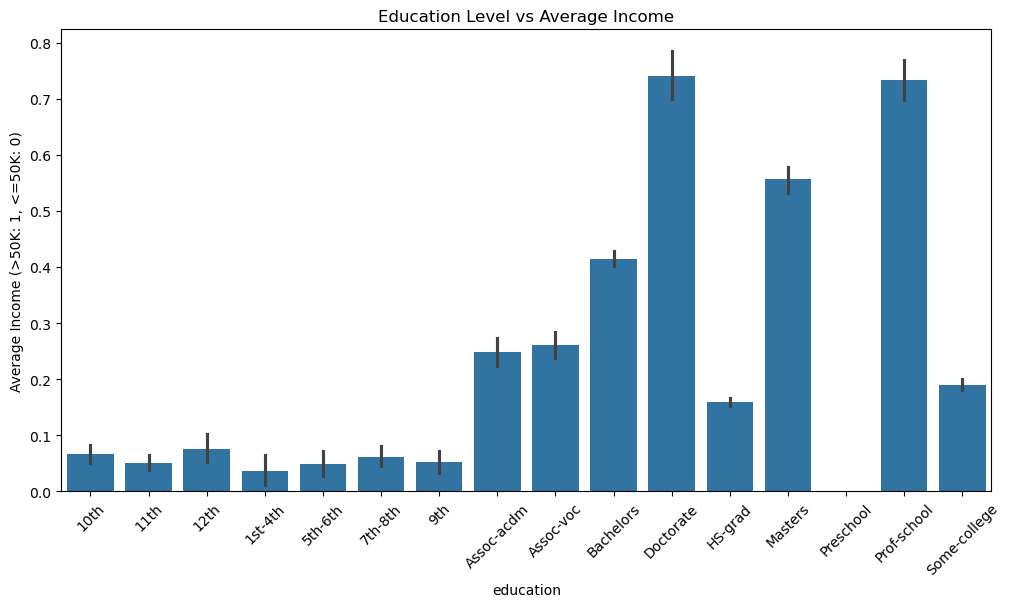

In [88]:
# 회귀 분석
race_income_model = smf.ols('income ~ race', data=data).fit()
print(race_income_model.summary())

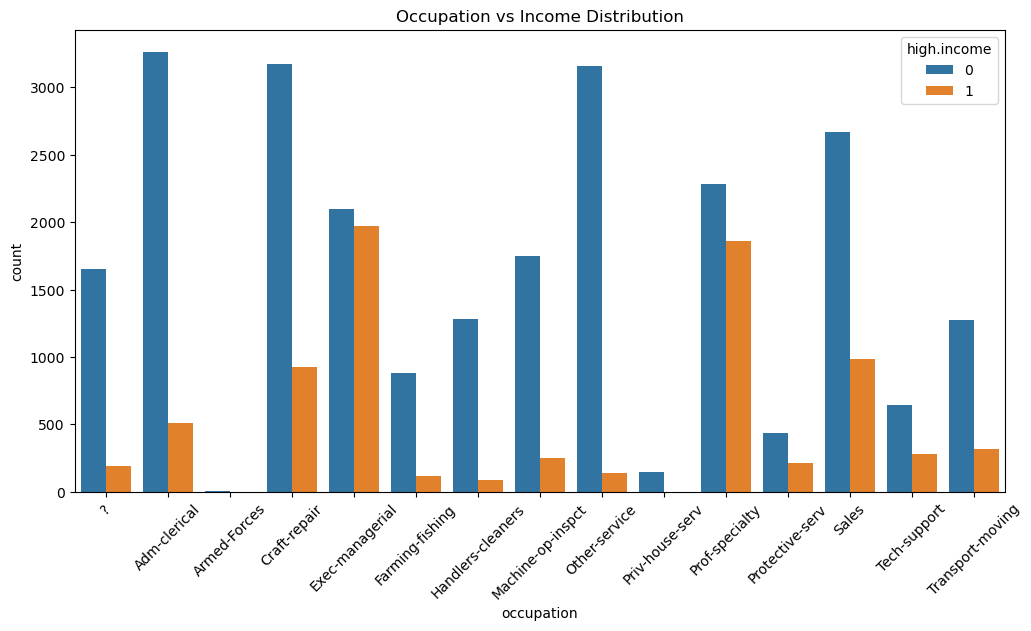

In [89]:
# 3. 성별에 따른 직업군이 수입 수준에 미치는 영향 분석
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='income', data=data)
plt.title('성별에 따른 수입 수준')
plt.xticks(rotation=45)
plt.show()

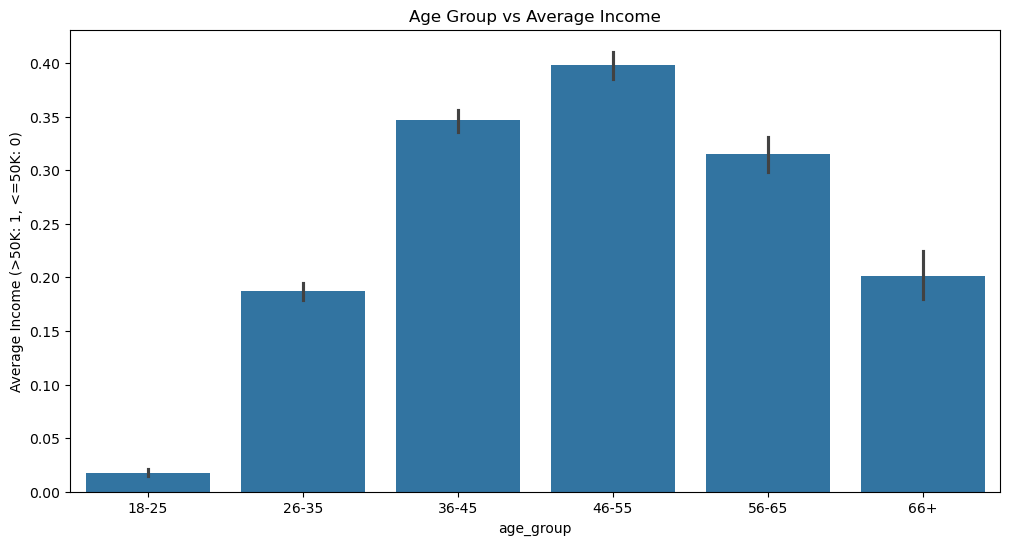

In [90]:
# 로지스틱 회귀 분석
gender_income_model = smf.logit('income ~ gender', data=data).fit()
print(gender_income_model.summary())